# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Exploration

In [6]:
df = pd.read_csv("fake reviews dataset.csv")
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [9]:
df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

In [10]:
df.rename(columns = {'text_':'text'},inplace = True)

In [11]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [12]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [13]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [14]:
df['category'].nunique()

10

Label column will be the target . It has two categories [OG & OR ] so binary classification will be performed.

## EDA

In [11]:
# calculate the class distribution of target column

label_count = df['label'].value_counts()
label_count

CG    20216
OR    20216
Name: label, dtype: int64

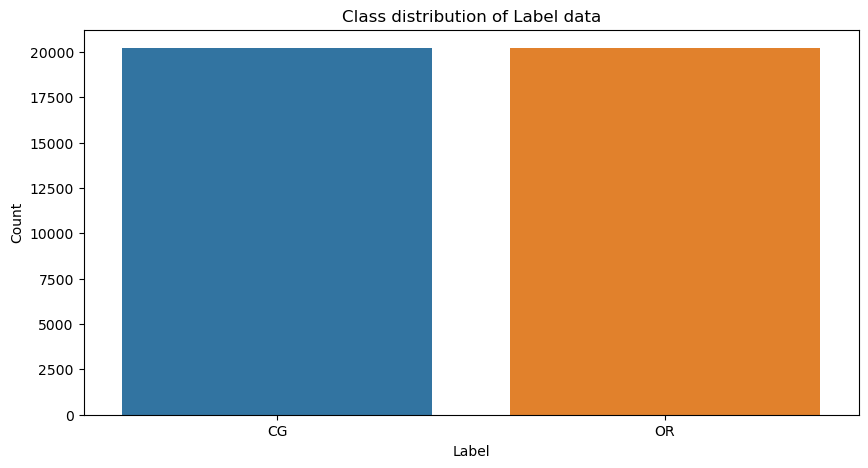

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(data = df , x = label_count.index , y = label_count.values)
plt.title("Class distribution of Label data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

The data is equally distributed with value count of 20216 for each OG and OR 

In [13]:
#distribution of rating 
rating_count = df['rating'].value_counts()
rating_count

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

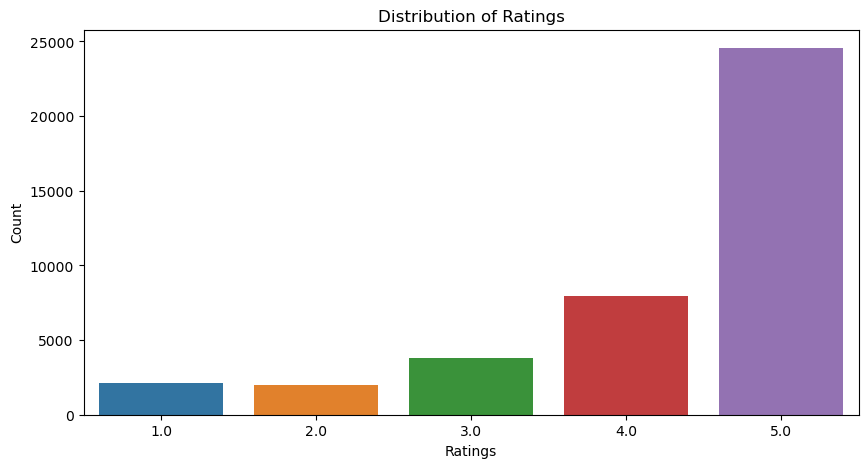

In [14]:
plt.figure(figsize =(10,5))
sns.barplot(data = df , x = rating_count.index , y = rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

Most of the products has 5 star ratings . 

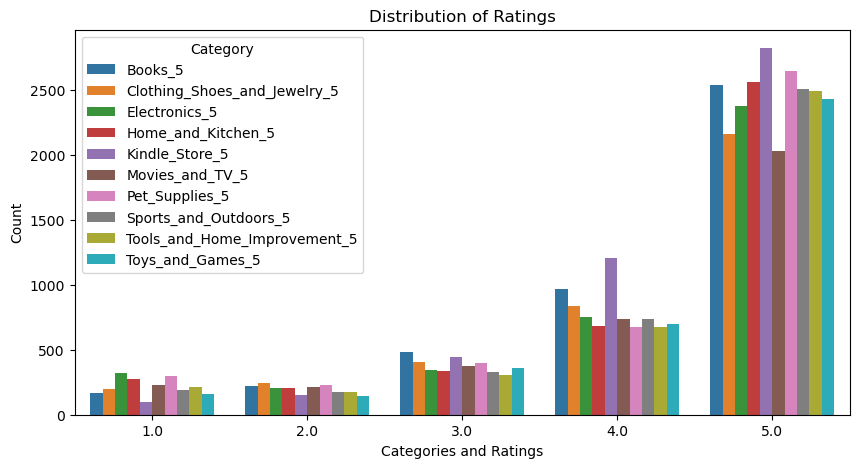

In [15]:
# Group by ratings and category
grouped_data = df.groupby(['rating', 'category']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_data, x='rating', y='count', hue='category')
plt.title("Distribution of Ratings")
plt.xlabel("Categories and Ratings")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

In the distribution of 5 star Ratings , Kindle store products has the highest ratings then Pet supplies etc.

## Data Preprocessing

Data Preprocessing in classification model includes Data Cleaning , Tokenization , Stemming or Lematization , Stop-word Removal 

### Data cleaning

In [15]:
# converting data in Text column to lower case

df['text'] = df['text'].str.lower()

In [16]:
#Removing Special Characters and Numbers: Removing non-alphabetic characters, numbers, and punctuation marks.

import re #re stands for Regular Expression -- used for matching , searching and manipulating text

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [17]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...


In [18]:
#Removing extra Whitespaces 
df['text'] = df['text'].str.strip()

### Tokenization

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
df['tokens'] = df['text'].apply(word_tokenize)

In [21]:
df.head()

,category,rating,label,text,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"[love, this, well, made, sturdy, and, very, co..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"[love, it, a, great, upgrade, from, the, origi..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"[this, pillow, saved, my, back, i, love, the, ..."
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"[missing, information, on, how, to, use, it, b..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"[very, nice, set, good, quality, we, have, had..."


### Stop-word Removal

In [22]:
#Using libraries like NLTK for pre-defined stopwords list

from nltk.corpus import stopwords

In [23]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words] )

### Stemming or Lematization

In [24]:
import nltk

In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [28]:
df.head()

,category,rating,label,text,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"[love, well, made, sturdy, comfortable, love, ..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"[love, great, upgrade, original, ive, mine, co..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"[pillow, saved, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"[missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"[nice, set, good, quality, set, two, month]"


In [29]:
# Join tokens into a single string
df['joined_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,category,rating,label,text,tokens,joined_text
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"[love, well, made, sturdy, comfortable, love, ...",love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"[love, great, upgrade, original, ive, mine, co...",love great upgrade original ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"[pillow, saved, back, love, look, feel, pillow]",pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"[missing, information, use, great, product, pr...",missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"[nice, set, good, quality, set, two, month]",nice set good quality set two month


In [50]:
df.to_csv("Downloads\cleaned_review_data.csv")

### Feature Extraction

In [30]:
#TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words by importance relative to the entire corpus.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Limit features to top 5000 words
X = tfidf.fit_transform(df['joined_text'])
y = df['label']

## Split the Dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Choosing a model

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Evaluation

In [42]:
from sklearn.metrics import classification_report , accuracy_score

#predict the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8711512303697292
Classification Report:
               precision    recall  f1-score   support

          CG       0.88      0.85      0.87      4016
          OR       0.86      0.89      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



## Confusion matrix

A confusion matrix is a performance evaluation tool for classification models. It shows the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

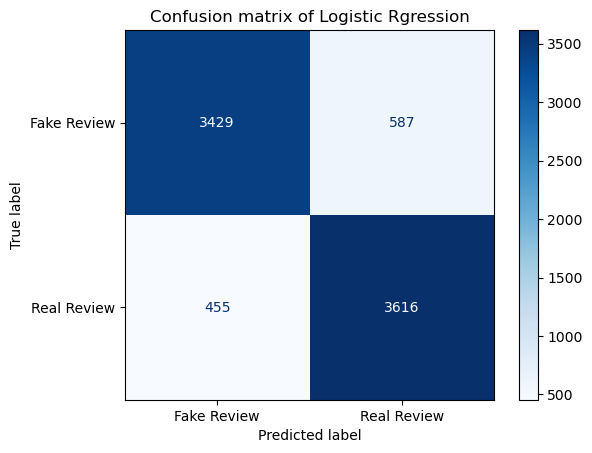

In [43]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of Logistic Rgression")
plt.show()

In [35]:
# to increase the accuracy Randomforestclassifier is used

### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
rf_y_pred = rf_model.predict(X_test)

In [39]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.8451836280450105
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      4016
          OR       0.87      0.81      0.84      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



## Confusion matrix

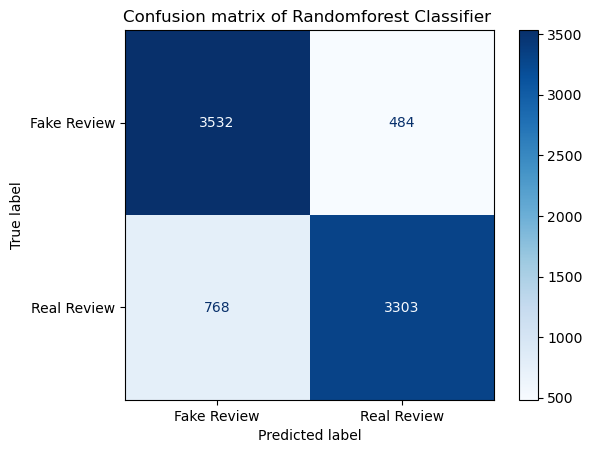

In [40]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,rf_y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of Randomforest Classifier ")
plt.show()

### SVM

In [32]:
from sklearn.svm import SVC 

#Train SVM model 
svm_model = SVC(kernel = 'linear',C = 1)
svm_model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [33]:
svm_model_pred = svm_model.predict(X_test)

In [35]:
#Print evaluation metrics
from sklearn.metrics import classification_report , accuracy_score

print("Accuracy:", accuracy_score(y_test,svm_model_pred))
print("Classification Report:\n", classification_report(y_test,svm_model_pred))

Accuracy: 0.8727587486088785
Classification Report:
               precision    recall  f1-score   support

          CG       0.87      0.87      0.87      4016
          OR       0.87      0.88      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



## Confusion matrix for SVM

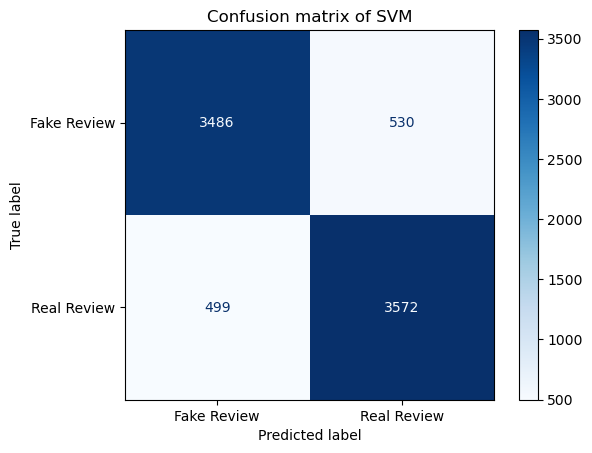

In [36]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,svm_model_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of SVM")
plt.show()

### Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [46]:
y_pred_nb = nb.predict(X_test)

In [47]:
#Print evaluation metrics

print("Accuracy:", accuracy_score(y_test,y_pred_nb))
print("Classification Report:\n", classification_report(y_test,y_pred_nb))

Accuracy: 0.847656733028317
Classification Report:
               precision    recall  f1-score   support

          CG       0.83      0.87      0.85      4016
          OR       0.86      0.83      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



## Confusion matrix

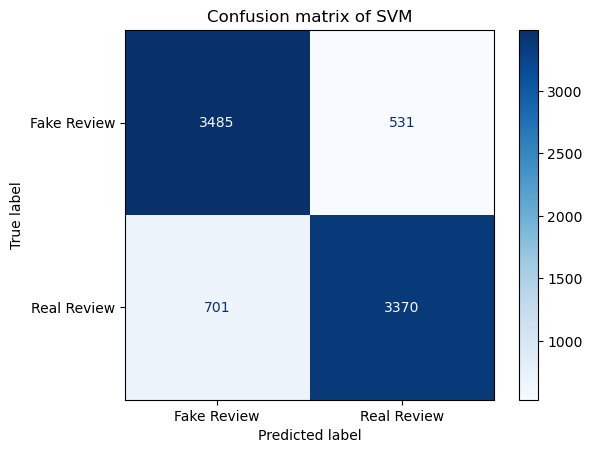

In [48]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred_nb)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of SVM")
plt.show()

## Comparing model performance

In [49]:
print("Performance of various ML models :")
print('\n')
print("Logistic Regression Prediction Accuracy :" , str(np.round(accuracy_score(y_test,y_pred)*100,2))+'%')
print("Random Forest Prediction Accuracy :" , str(np.round(accuracy_score(y_test,rf_y_pred)*100,2))+'%')
print("SVM Prediction Accuracy :" , str(np.round(accuracy_score(y_test,svm_model_pred)*100,2))+'%')
print("Naive Bayes Prediction Accuracy :" , str(np.round(accuracy_score(y_test,y_pred_nb)*100,2))+'%')

Performance of various ML models :


Logistic Regression Prediction Accuracy : 87.12%
Random Forest Prediction Accuracy : 84.52%
SVM Prediction Accuracy : 87.28%
Naive Bayes Prediction Accuracy : 84.77%


The Support vector machine model performs better than any other models with an accuracy rate of 87.28 %